<a href="https://colab.research.google.com/github/theorignalmapdcodex/dtk531_i2_rc/blob/main/dtk531_i2_rc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

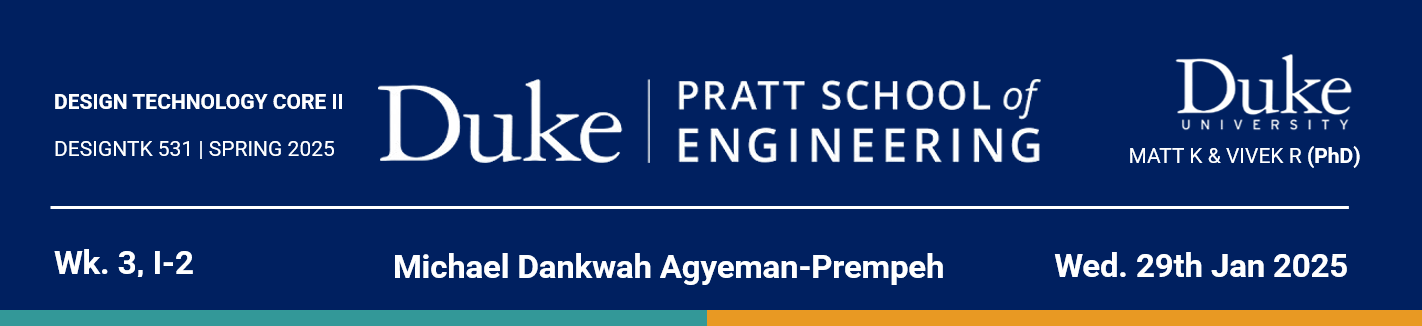
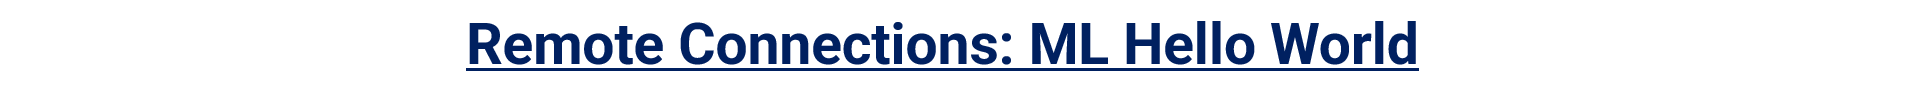

### Goal of Assignment
----
#### This assignment involves creating a Python project that combines MQTT (a messaging protocol commonly used in IoT) with OpenAI's Large Language Model capabilities. The goal is to build a system that can receive messages through MQTT, process them using OpenAI's LLM to generate analysis or responses, and output the results. The project requires setting up a proper development environment, implementing both MQTT and LLM functionality, creating test scripts, documenting the work, and finally publishing it to GitHub as a complete, working demonstration of these integrated technologies.

In [15]:
# To ignore warnings for code output to look clean
import warnings
warnings.filterwarnings("ignore")

**<mark>Pre-test A</mark> - Activating already created Python virtual environment names 'i2_venv'**

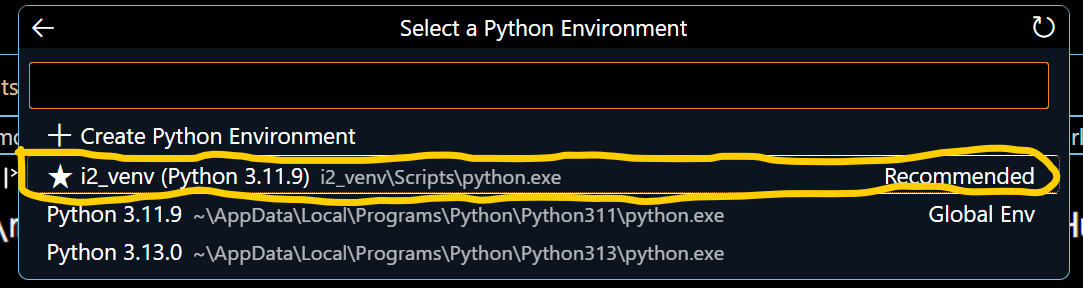
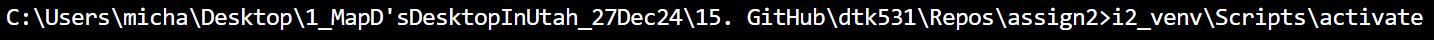

**<mark>Pre-test B</mark> - Confirming package installer 'pip' is installed and readily available for necessary package installation'**

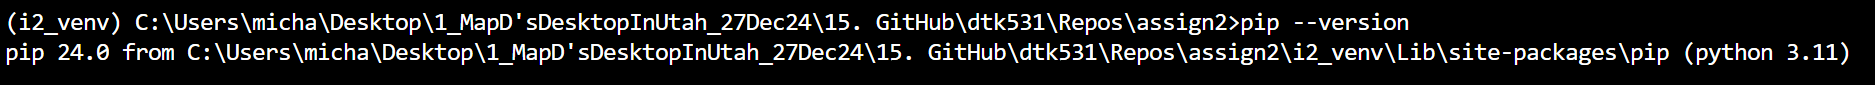

**<mark>Pre-test C</mark> - Including 'paho-mqtt' & in this case 'gemini-api' as opposed to openai (as I do not have credits) in the 'requirements.txt' file for this project before installation all other necessary dependencies**

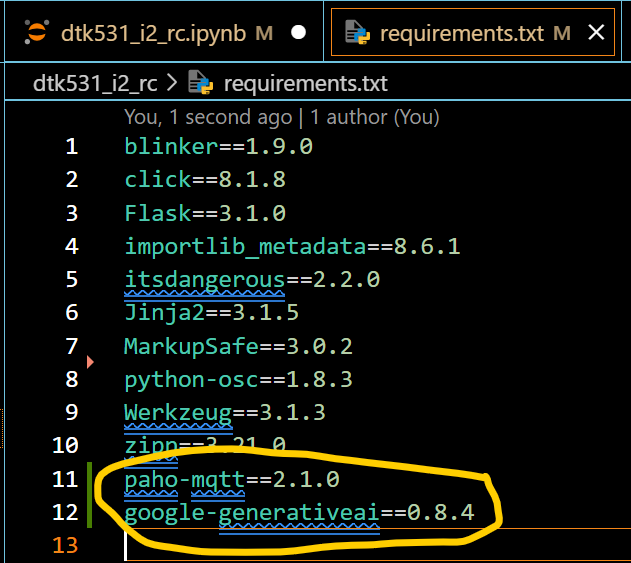

**<mark>Pre-test D</mark> - Verifying local system is connected to git remote branch for the assignment**

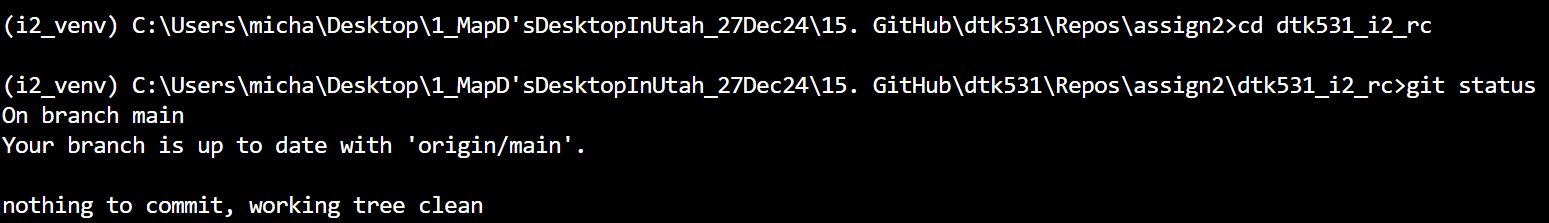

----

Now, let's proceed further!

### **I. Installing all packages required for this project via 'pip install'**

In [16]:
# Installing the dependencies
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Adding reeently installed dependencies to the requirements file
!pip freeze > requirements.txt

### **III. Importing Essential Libraries for Tasks Execution**

In [18]:
# Importing basic libraries
import numpy as np
import scipy as sp
import datetime as dt

---

## <mark>*End Of The Notebook!*</mark>